In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("DS1_C5_S1_Income_Data_Challenge.xlsx")
df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


# Task 1
Display the basic information about the dataset, which includes all the columns with the data type of the columns. Also, display the count of missing values for each column.

In [6]:
df.count()

Age               32561
WorkClass         32561
Education         32561
Education_Num     32561
Marital_Status    32561
Occupation        32561
Relationship      32561
Gender            32561
Hours_Per_Week    32561
Native_Country    32561
Income_Bracket    32561
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [8]:
df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

# Task 2
Create two different lists of categorical columns and numerical columns by defining a function to identify the data type.

In [48]:
def sep_info(df):
    categorical = []
    continuous = []
    for i in df.columns:
        if df[i].nunique() < 50:
            categorical.append(i)
        else:
            continuous.append(i)
    return categorical, continuous

categorical, continuous = sep_info(df)

from tabulate import tabulate

table = [categorical,continuous]
print(tabulate({"categorical":categorical, "continuous": continuous}, headers = ["categorical","continuous"]))
            

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Hours_Per_Week
Education_Num
Marital_Status
Occupation
Relationship
Gender
Native_Country
Income_Bracket


# Task 3
Define a function to find the unique values and mode value from each categorical column (identified in Task 2).
Also, check for the missing values and perform missing value treatment, if required.

In [14]:
def cat_info(col):
    print("unique values:", df[col].unique())
    print("Mode:", df[col].mode()[0])
    print("Missing values:", df[col].isnull().sum())

In [15]:
cat_info("WorkClass")

unique values: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode:  Private
Missing values: 0


In [16]:
cat_info("Education")

unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode:  HS-grad
Missing values: 0


In [17]:
cat_info("Education_Num")

unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Mode: 9
Missing values: 0


In [18]:
cat_info("Marital_Status")

unique values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode:  Married-civ-spouse
Missing values: 0


In [19]:
cat_info("Occupation")

unique values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode:  Prof-specialty
Missing values: 0


In [20]:
cat_info("Relationship")

unique values: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Mode:  Husband
Missing values: 0


In [21]:
cat_info("Gender")

unique values: [' Male' ' Female']
Mode:  Male
Missing values: 0


In [22]:
cat_info("Income_Bracket")

unique values: [' <=50K' ' >50K']
Mode:  <=50K
Missing values: 0


In [49]:
cat_info("Native_Country")

unique values: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Mode:  United-States
Missing values: 0


# Task 4
Perform descriptive analysis of the categorical columns (identified in Task 2) with the help of univariate graphs/charts.
Note; Use the bar graph/count plot and pie chart to visualize the categorical columns.

In [23]:
def cat_chart(col):
    dist= df[col].value_counts()
    fig, ax=plt.subplots(1,2, figsize= (15,6))       
    ax[0].set_title("count of"+str(col))           
    labels= list(dist. index)                             

    sns.countplot(x= df[col], ax= ax[0])              
    plt.pie(dist, labels= labels, autopct="%0.2f%%")      

    plt.show()

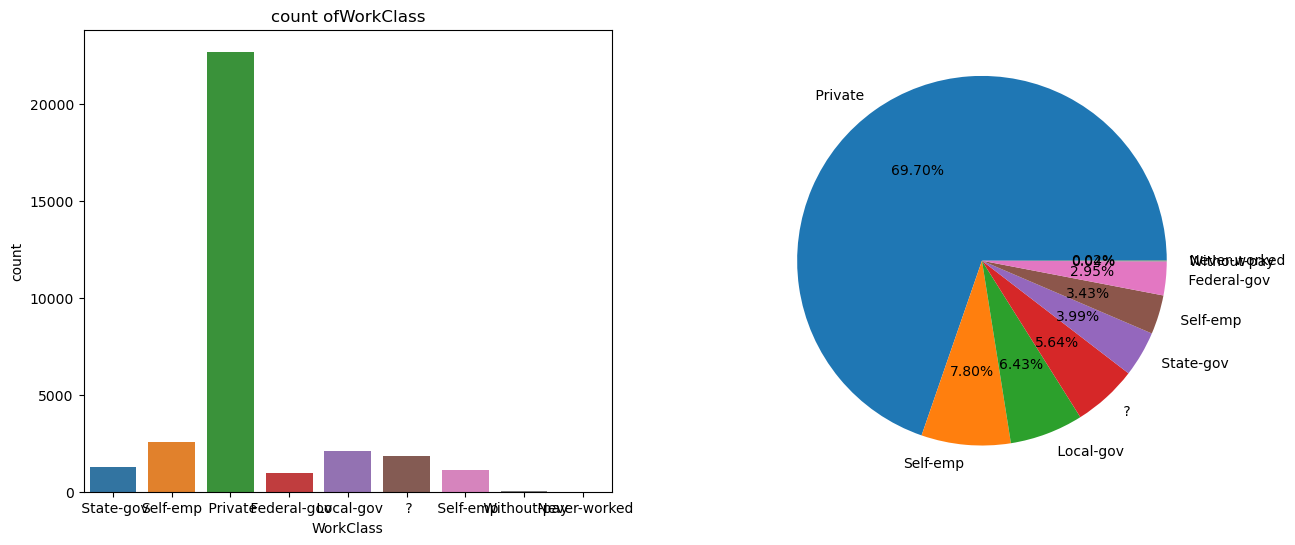

In [24]:
cat_chart("WorkClass")

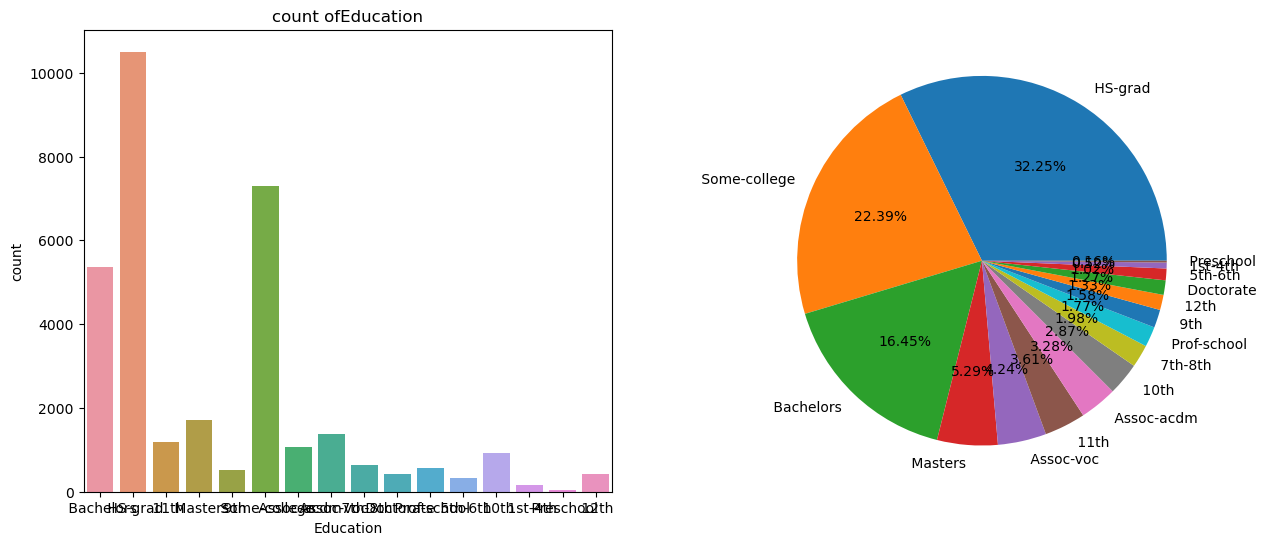

In [25]:
cat_chart("Education")

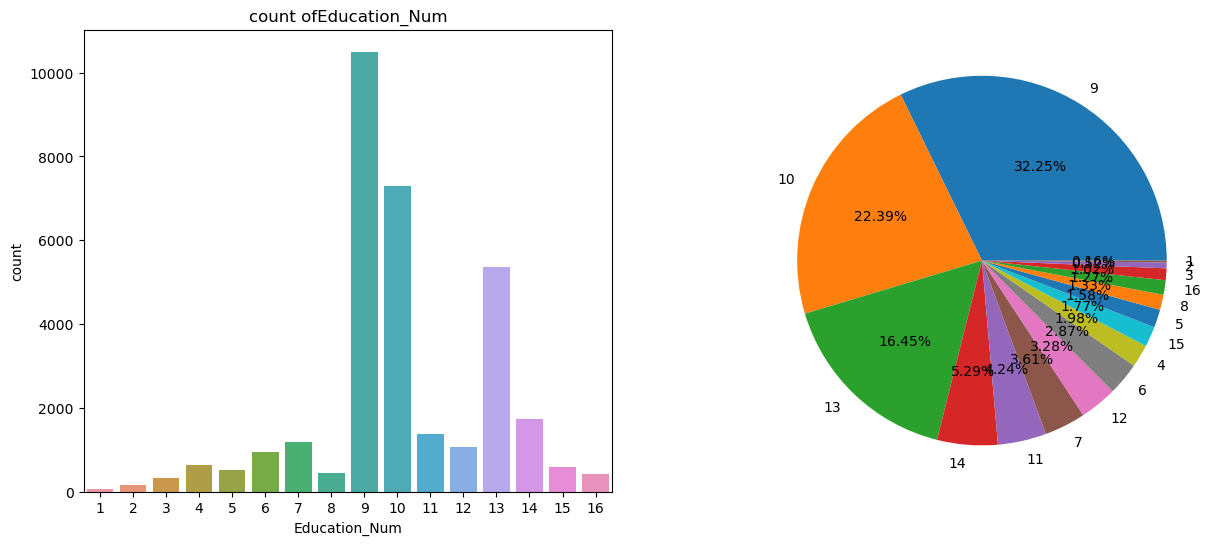

In [26]:
cat_chart("Education_Num")

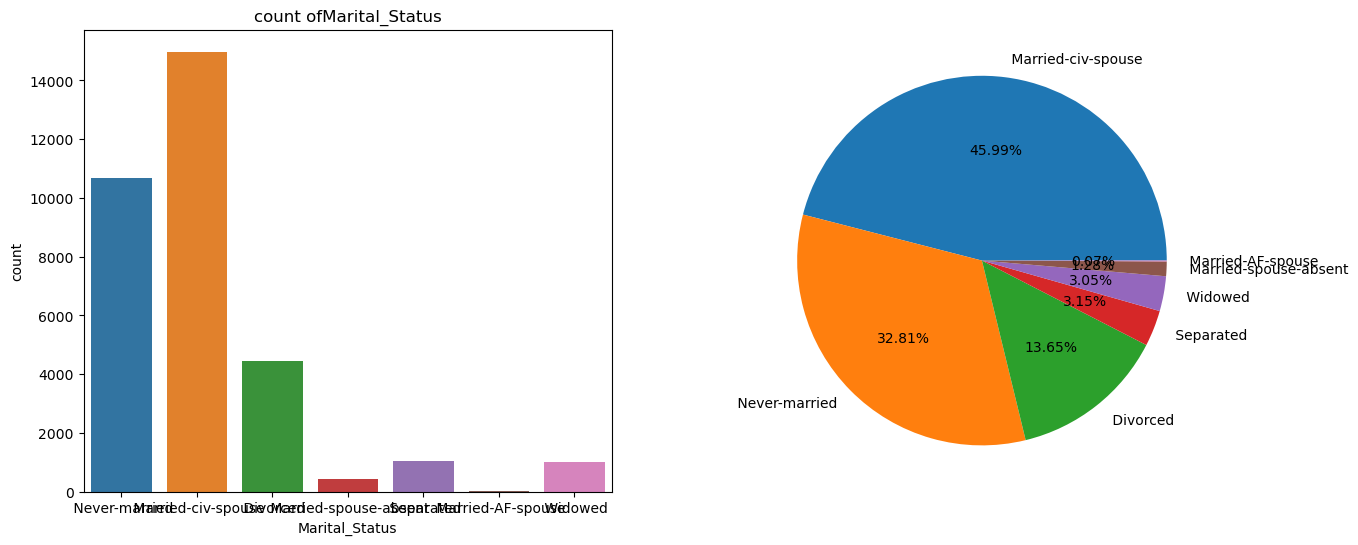

In [27]:
cat_chart("Marital_Status")

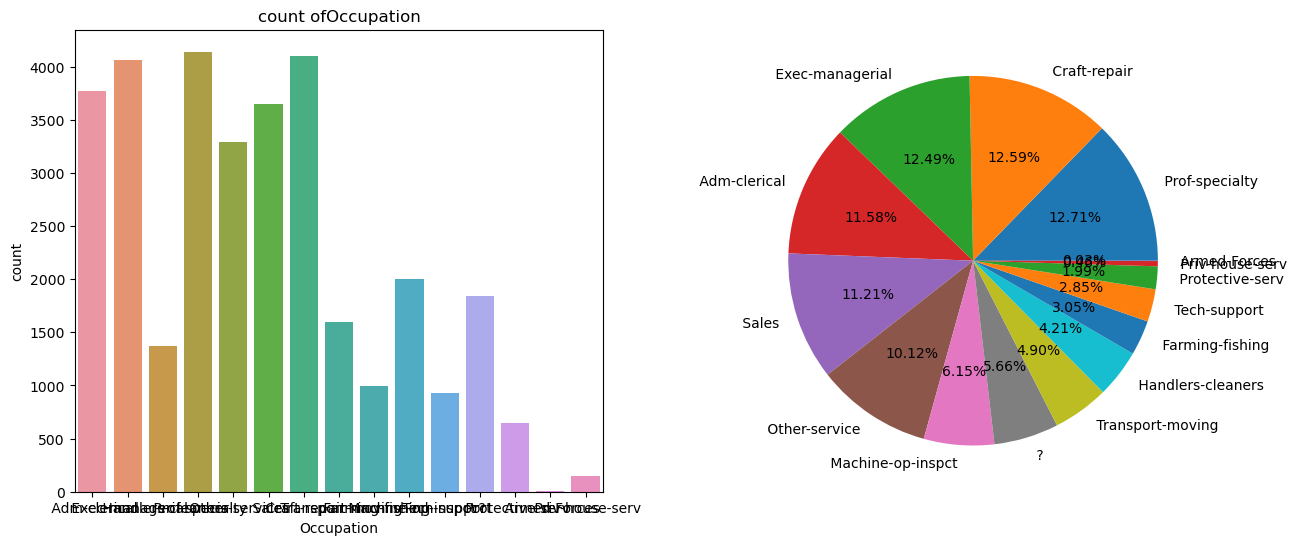

In [28]:
cat_chart("Occupation")

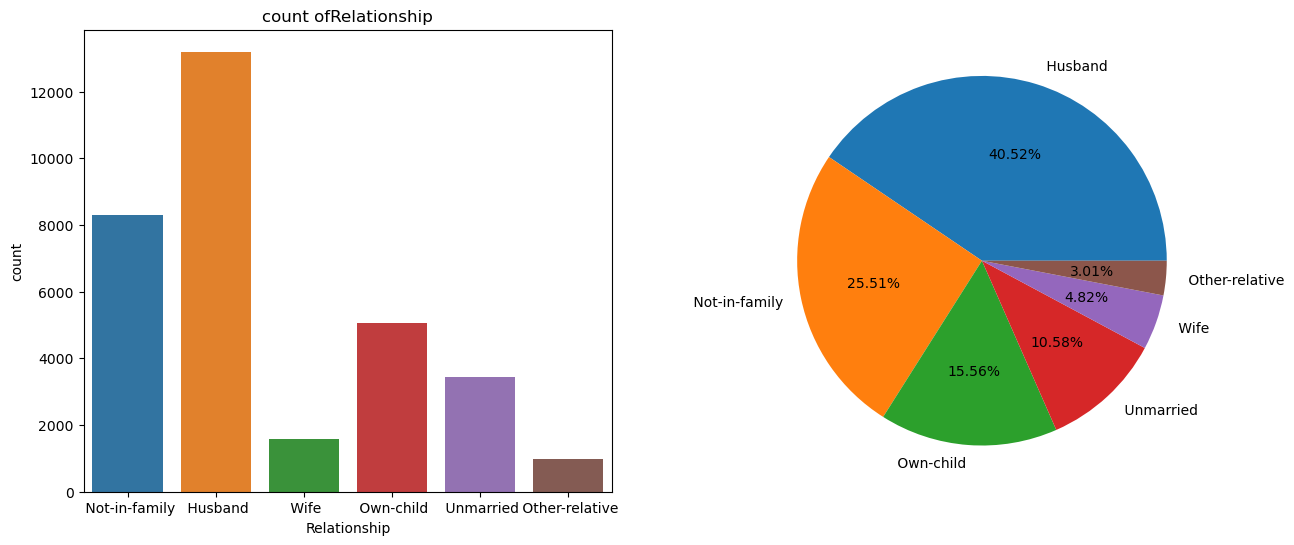

In [29]:
cat_chart("Relationship")

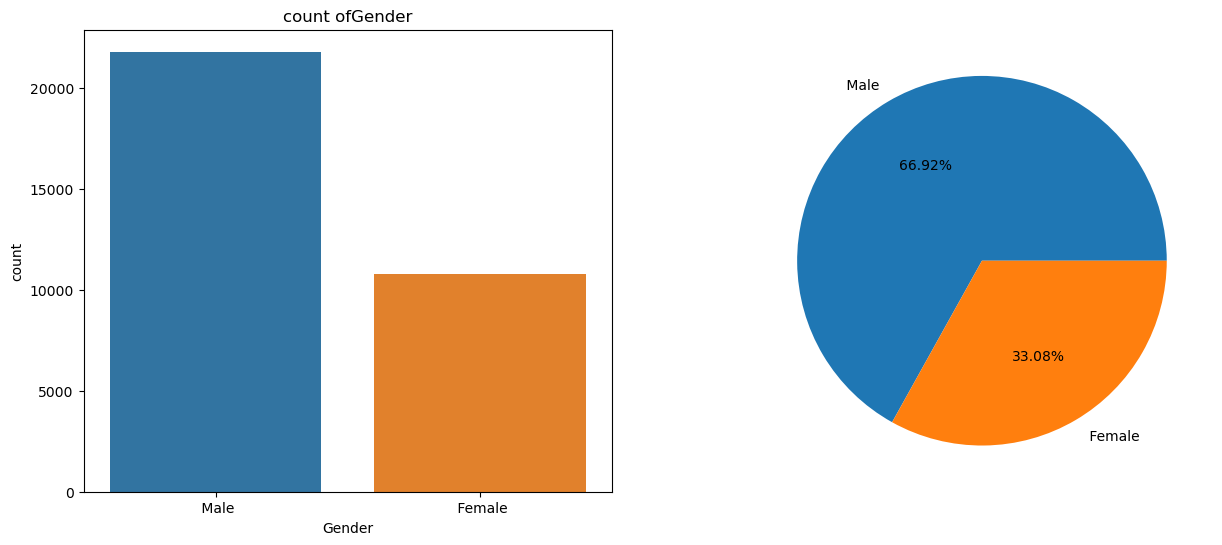

In [30]:
cat_chart("Gender")

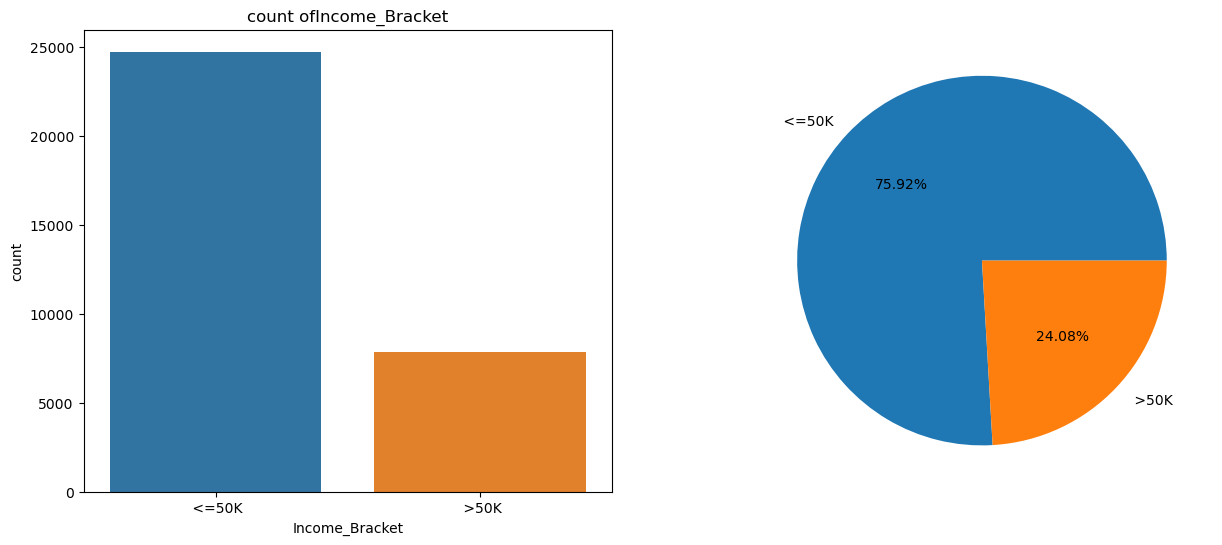

In [31]:
cat_chart("Income_Bracket")

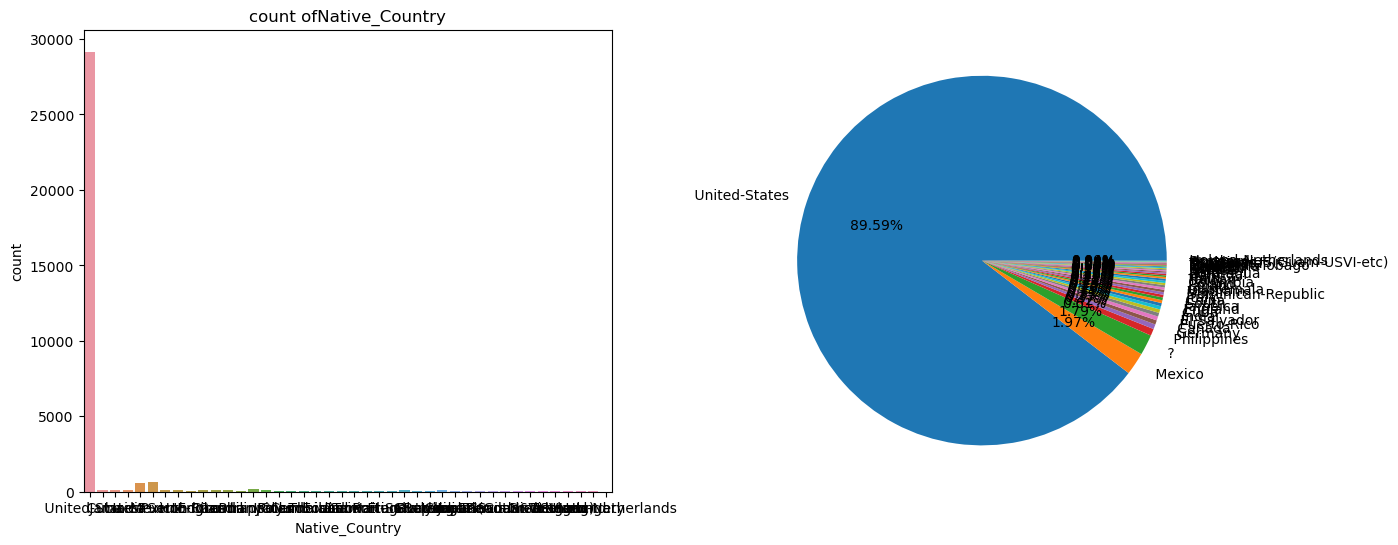

In [50]:
cat_chart("Native_Country")

# Task 5
Perform descriptive analysis of each numerical column by defining a function to print the following information.
• The measures of central tendency (mean, median)
• The standard deviation of a variable
• The missing values of a variable
• The skewness of a variable
Perform the missing value treatment, if required.

In [34]:
def info_num(col):                    #numerical
    print(col)
    print("Mean:",df[col].mean())
    print("Median:",df[col].median())
    print("Standard deviation:",df[col].std())
    print("skewness", df[col].skew())
    print("standard deviation:", df[col].std())
    print("Minimum value:",df[col].min())
    print("Maximum value:",df[col].max())
    print("Missing value:",df[col].isnull().sum())

In [35]:
info_num("Age")

Age
Mean: 38.58164675532078
Median: 37.0
Standard deviation: 13.640432553581146
skewness 0.5587433694130484
standard deviation: 13.640432553581146
Minimum value: 17
Maximum value: 90
Missing value: 0


In [36]:
info_num("Hours_Per_Week")

Hours_Per_Week
Mean: 40.437455852092995
Median: 40.0
Standard deviation: 12.34742868173081
skewness 0.22764253680450092
standard deviation: 12.34742868173081
Minimum value: 1
Maximum value: 99
Missing value: 0


# Task 6
Perform descriptive analysis of the numerical columns (identified in Task 2) with the help of univariate graphs/charts.
Note: Use the histogram and box plot to visualize the numerical columns.

In [51]:
def num_charts(col):
    fig, ax = plt.subplots(1,2, figsize=(15,8))
    sns.histplot(df[col], ax = ax[0], color= "m")
    sns.boxplot(df[col], ax = ax[1], color= "m")
    plt.show()

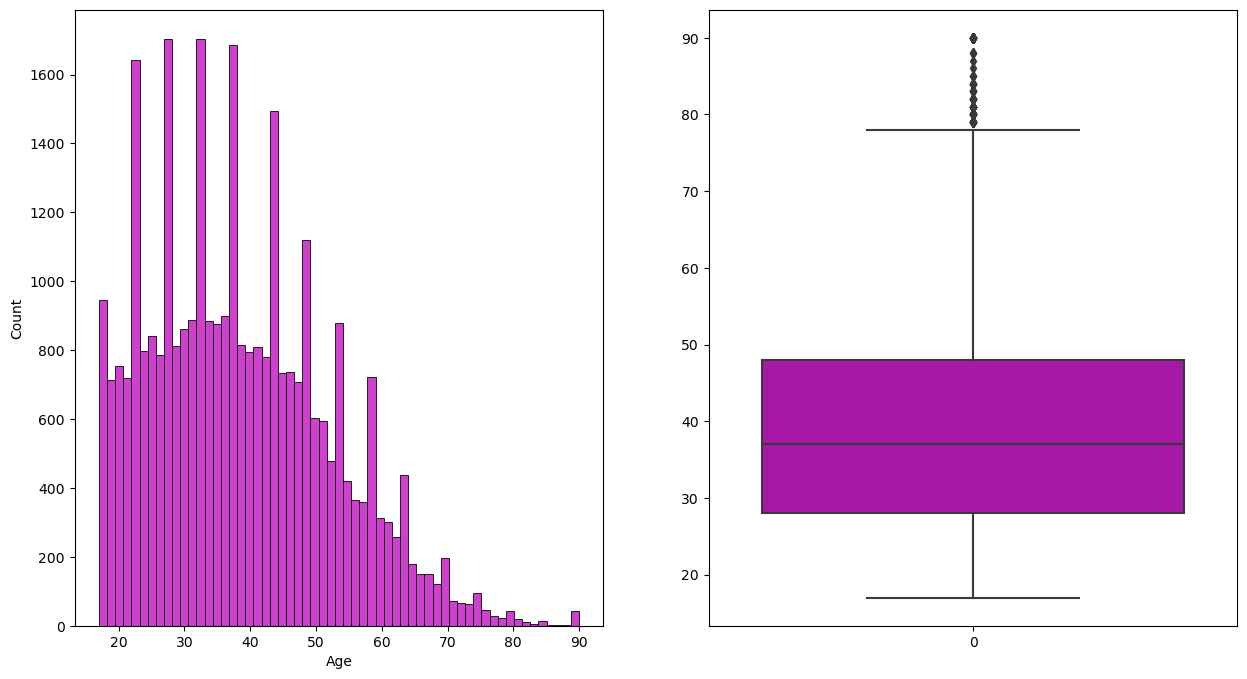

In [52]:
num_charts("Age")

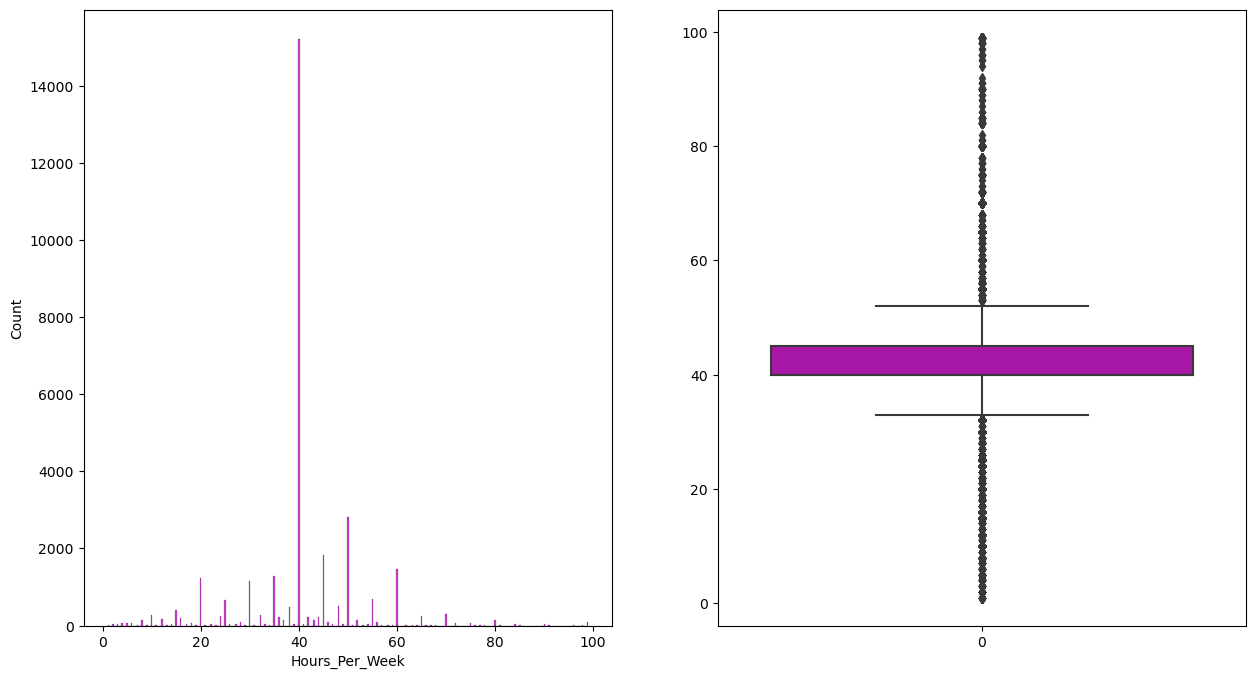

In [53]:
num_charts("Hours_Per_Week")